## Worksample
### Rachael Stone

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix, auc
from sklearn import metrics, tree 
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

### Load data

In [2]:
#Import CSV
df = pd.read_csv('metadata.csv')

In [3]:
#what does the data look like?
print(len(df))
df[:5]

305520


,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
0,HRCE-1_1_AA02_1,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,1,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
1,HRCE-1_1_AA02_2,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,2,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
2,HRCE-1_1_AA02_3,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,3,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
3,HRCE-1_1_AA02_4,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,4,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
4,HRCE-1_1_AA03_1,HRCE-1_1_AA03,HRCE,HRCE-1,1,AA03,1,Active SARS-CoV-2,acetylcysteine,1.0,"CC(=O)N[C@H](CS)C(O)=O |a:4,r|"


In [4]:
#Import CSV for embeddings
embeddings_df = pd.read_csv('embeddings.csv')
embeddings_df[:5]

,site_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_1014,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023
0,HRCE-1_10_AA02_1,2.355969,-0.058361,-0.169764,-0.316499,-0.891334,0.581174,-0.284587,-0.279198,-0.146575,...,0.391186,0.786199,-1.739626,-1.317543,-1.208275,-0.507439,-0.317298,0.285018,-0.091285,-1.553895
1,HRCE-1_10_AA02_2,2.325652,-0.202519,-0.296017,-0.481136,-0.641461,0.702847,0.334191,-0.077498,-0.314538,...,0.638674,1.051621,-1.355659,-1.285210,-1.341911,-0.271349,-0.157707,0.081128,-0.447174,-1.614872
2,HRCE-1_10_AA02_3,2.207082,-0.379794,-0.365562,-0.196667,-0.799039,0.735813,0.081227,-0.393452,0.066324,...,0.552127,0.775428,-1.616731,-0.868382,-1.334486,-0.774456,-0.363250,0.161023,-0.066745,-1.325545
3,HRCE-1_10_AA02_4,2.452741,0.050658,-0.444642,-0.309758,-0.724900,0.658327,-0.128331,-0.164759,0.279105,...,0.689145,1.167066,-1.275786,-2.088455,-1.231964,-0.364454,-0.135066,0.493010,-0.544680,-1.290150
4,HRCE-1_10_AA03_1,2.106868,0.032095,-0.175542,-0.808618,-0.806217,0.721340,-0.213196,-0.187649,-0.070294,...,0.385696,0.503924,-1.192554,-1.123965,-1.323457,-0.359761,-0.100340,0.185773,-0.394267,-1.712760


### Explore data

#### Look into the entire dataframe

In [5]:
df.count()
### These values are to be expected. disease_condition, treatment, treatment_conc, SMILES are different values due to the blanks in the dataframe.

site_id              305520
well_id              305520
cell_type            305520
experiment           305520
plate                305520
well                 305520
site                 305520
disease_condition    298616
treatment            263184
treatment_conc       263184
SMILES               263184
dtype: int64

#### Look into variable site_id

In [6]:
df.groupby(by=['site_id'], dropna=False).size() 
# Looks to be expected
# This variable is used to id. It will not be of use to the model.

site_id
HRCE-1_10_AA02_1    1
HRCE-1_10_AA02_2    1
HRCE-1_10_AA02_3    1
HRCE-1_10_AA02_4    1
HRCE-1_10_AA03_1    1
                   ..
VERO-2_2_Z46_4      1
VERO-2_2_Z47_1      1
VERO-2_2_Z47_2      1
VERO-2_2_Z47_3      1
VERO-2_2_Z47_4      1
Length: 305520, dtype: int64

In [7]:
df.groupby(['site_id']).filter(lambda x: len(x) > 1)
# Results to be expected


,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES


#### Look into variable well_id

In [8]:
df.groupby(by=['well_id'], dropna=False).size() 
# Looks to be expected
# This variable is used to id. It will not be of use to the model.

well_id
HRCE-1_10_AA02    4
HRCE-1_10_AA03    4
HRCE-1_10_AA04    4
HRCE-1_10_AA05    4
HRCE-1_10_AA06    4
                 ..
VERO-2_2_Z43      4
VERO-2_2_Z44      4
VERO-2_2_Z45      4
VERO-2_2_Z46      4
VERO-2_2_Z47      4
Length: 76380, dtype: int64

In [9]:
df.groupby(['well_id']).filter(lambda x: len(x) > 4)
# Results to be expected

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES


#### Look into variable cell_type

In [10]:
df.groupby(by=['cell_type'], dropna=False).size() 
# Note that cell_type variable is not balanced 
# This variable will be of interest in the model.
# Maybe two model (one for each cell_type) might be better than one if the results are very different.

cell_type
HRCE    284080
VERO     21440
dtype: int64

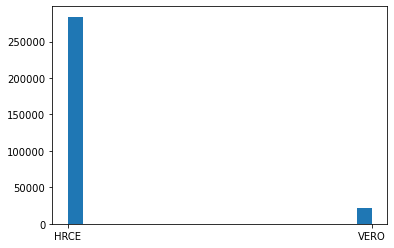

In [11]:
plt.hist(df['cell_type'], bins='auto')
plt.show()
# 

#### Look into variable experiment

In [12]:
df.groupby(by=['experiment'], dropna=False).size() 
# Note that experiment variable is not balanced 
# This variable will be one of the main features going into the model.
# Maybe a rules based approach would be best or several models might be better than one if the results vary greatly between experiments between HRCE and VERO

# Is there a reason HRCE-1 has a different count than HRCE-2?


experiment
HRCE-1    139360
HRCE-2    144720
VERO-1     10720
VERO-2     10720
dtype: int64

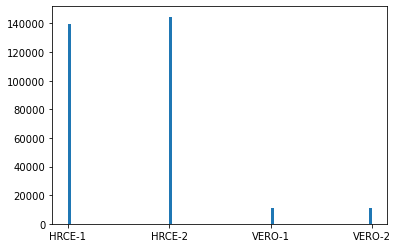

In [13]:
plt.hist(df['experiment'], bins='auto')
plt.show()

#### Look into variable plate

In [14]:
df.groupby(by=['plate'], dropna=False).size() 


plate
1     21440
2     21440
3     10720
4     10720
5     10720
6     10720
7     10720
8     10720
9     10720
10    10720
11    10720
12    10720
13    10720
14    10720
15    10720
16    10720
17    10720
18    10720
19    10720
20    10720
21    10720
22    10720
23    10720
24    10720
25    10720
26    10720
27     5360
dtype: int64

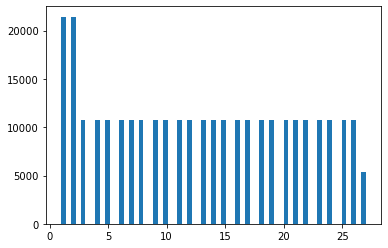

In [15]:
plt.hist(df['plate'], bins='auto')
plt.show()

In [16]:
# Why are plate 1, 2, and 27 different? Shouldn't this be uniform? Is there a reason for this? Do they have something in common?
# I don't have enough context to say whether or not this data should be excluded or altered. Therefore, I will leave the data included in my dataset.
df[(df['plate'] == 1) | (df['plate'] == 2) | (df['plate'] == 27)][:1000]

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
0,HRCE-1_1_AA02_1,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,1,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
1,HRCE-1_1_AA02_2,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,2,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
2,HRCE-1_1_AA02_3,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,3,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
3,HRCE-1_1_AA02_4,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,4,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
4,HRCE-1_1_AA03_1,HRCE-1_1_AA03,HRCE,HRCE-1,1,AA03,1,Active SARS-CoV-2,acetylcysteine,1.0,"CC(=O)N[C@H](CS)C(O)=O |a:4,r|"
...,...,...,...,...,...,...,...,...,...,...,...
995,HRCE-1_1_B20_4,HRCE-1_1_B20,HRCE,HRCE-1,1,B20,4,Active SARS-CoV-2,R-Selegiline,0.1,"C[C@H](CC1=CC=CC=C1)N(C)CC#C |c:5,7,t:3|"
996,HRCE-1_1_B21_1,HRCE-1_1_B21,HRCE,HRCE-1,1,B21,1,Active SARS-CoV-2,Rovamycin,1.0,CO[C@H]1[C@H](O)CC(=O)O[C@H](C)C\C=C\C=C\[C@H]...
997,HRCE-1_1_B21_2,HRCE-1_1_B21,HRCE,HRCE-1,1,B21,2,Active SARS-CoV-2,Rovamycin,1.0,CO[C@H]1[C@H](O)CC(=O)O[C@H](C)C\C=C\C=C\[C@H]...
998,HRCE-1_1_B21_3,HRCE-1_1_B21,HRCE,HRCE-1,1,B21,3,Active SARS-CoV-2,Rovamycin,1.0,CO[C@H]1[C@H](O)CC(=O)O[C@H](C)C\C=C\C=C\[C@H]...


In [17]:
#look into above

#### Look into variable well

In [18]:
df.groupby(by=['well'], dropna=False).size() 
# Looks to be expected
# This variable is used to id. It will not be of use to the model.

well
AA02    228
AA03    228
AA04    228
AA05    228
AA06    228
       ... 
Z43     228
Z44     228
Z45     228
Z46     228
Z47     228
Length: 1340, dtype: int64

In [19]:
df.groupby(['well_id']).filter(lambda x: len(x) > 228)
# Results to be expected

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES


#### Look into variable site

In [20]:
df.groupby(by=['site'], dropna=False).size() 
# Looks to be expected
# This variable is used to id. It will not be of use to the model.

site
1    76380
2    76380
3    76380
4    76380
dtype: int64

#### Look into variable disease_condition

In [21]:
df.groupby(by=['disease_condition'], dropna=False).size() 
# This variable will be our outcome variable
# I need to determine how to best handle Nans

disease_condition
Active SARS-CoV-2            280376
Mock                           9120
UV Inactivated SARS-CoV-2      9120
NaN                            6904
dtype: int64

In [22]:
df[df['disease_condition'].isna()]

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
392,HRCE-1_1_AC08_1,HRCE-1_1_AC08,HRCE,HRCE-1,1,AC08,1,NaN,NaN,NaN,NaN
393,HRCE-1_1_AC08_2,HRCE-1_1_AC08,HRCE,HRCE-1,1,AC08,2,NaN,NaN,NaN,NaN
394,HRCE-1_1_AC08_3,HRCE-1_1_AC08,HRCE,HRCE-1,1,AC08,3,NaN,NaN,NaN,NaN
395,HRCE-1_1_AC08_4,HRCE-1_1_AC08,HRCE,HRCE-1,1,AC08,4,NaN,NaN,NaN,NaN
424,HRCE-1_1_AC16_1,HRCE-1_1_AC16,HRCE,HRCE-1,1,AC16,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
301571,VERO-2_2_D32_4,VERO-2_2_D32,VERO,VERO-2,2,D32,4,NaN,NaN,NaN,NaN
301600,VERO-2_2_D40_1,VERO-2_2_D40,VERO,VERO-2,2,D40,1,NaN,NaN,NaN,NaN
301601,VERO-2_2_D40_2,VERO-2_2_D40,VERO,VERO-2,2,D40,2,NaN,NaN,NaN,NaN
301602,VERO-2_2_D40_3,VERO-2_2_D40,VERO,VERO-2,2,D40,3,NaN,NaN,NaN,NaN


In [23]:
strdf=df
strdf['disease_condition'] = df['disease_condition'].astype('str')
strdf['disease_condition'][:5]

0    Active SARS-CoV-2
1    Active SARS-CoV-2
2    Active SARS-CoV-2
3    Active SARS-CoV-2
4    Active SARS-CoV-2
Name: disease_condition, dtype: object

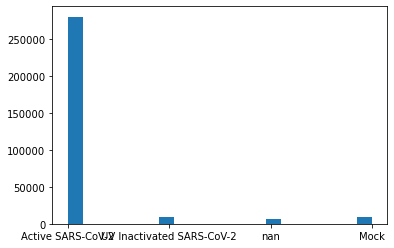

In [24]:
plt.hist(strdf['disease_condition'], bins='auto')
plt.show()

#### Look into variable treatment

In [25]:
#pd.set_option('display.max_rows', 1670)
df.groupby(by=['treatment'], dropna=False).size() 
# Input 
# I need to determine how to handle Nans

treatment
(+)-Cedrol                         144
(+)-Ephedrine (hydrochloride)      144
(+)-cloprostenol                   144
(-)-Huperzine A (HupA)             144
(R)-Tegafur                        144
                                 ...  
warfarin                           144
zofenopril-calcium                 144
zolimidine                         144
zuclopenthixol                     144
NaN                              42336
Length: 1670, dtype: int64

In [26]:
strdf['treatment'] = df['treatment'].astype('str')

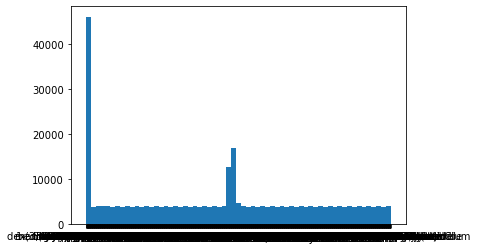

In [27]:
plt.hist(strdf['treatment'], bins='auto')
plt.show()

In [28]:
treatmentdf = df.groupby(['treatment']).filter(lambda x: len(x) < 40000)
treatmentdf[:5]

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
0,HRCE-1_1_AA02_1,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,1,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
1,HRCE-1_1_AA02_2,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,2,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
2,HRCE-1_1_AA02_3,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,3,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
3,HRCE-1_1_AA02_4,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,4,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
4,HRCE-1_1_AA03_1,HRCE-1_1_AA03,HRCE,HRCE-1,1,AA03,1,Active SARS-CoV-2,acetylcysteine,1.0,"CC(=O)N[C@H](CS)C(O)=O |a:4,r|"


In [29]:
treatmentdf = treatmentdf.groupby(['treatment']).filter(lambda x: len(x) > 144)
treatmentdf[:5]

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
904,HRCE-1_1_AE44_1,HRCE-1_1_AE44,HRCE,HRCE-1,1,AE44,1,Active SARS-CoV-2,Efonidipine,0.01,CC1=C(C(C2=CC(=CC=C2)[N+]([O-])=O)C(=C(C)N1)P1...
905,HRCE-1_1_AE44_2,HRCE-1_1_AE44,HRCE,HRCE-1,1,AE44,2,Active SARS-CoV-2,Efonidipine,0.01,CC1=C(C(C2=CC(=CC=C2)[N+]([O-])=O)C(=C(C)N1)P1...
906,HRCE-1_1_AE44_3,HRCE-1_1_AE44,HRCE,HRCE-1,1,AE44,3,Active SARS-CoV-2,Efonidipine,0.01,CC1=C(C(C2=CC(=CC=C2)[N+]([O-])=O)C(=C(C)N1)P1...
907,HRCE-1_1_AE44_4,HRCE-1_1_AE44,HRCE,HRCE-1,1,AE44,4,Active SARS-CoV-2,Efonidipine,0.01,CC1=C(C(C2=CC(=CC=C2)[N+]([O-])=O)C(=C(C)N1)P1...
1296,HRCE-1_1_D04_1,HRCE-1_1_D04,HRCE,HRCE-1,1,D04,1,Active SARS-CoV-2,Efonidipine,0.10,CC1=C(C(C2=CC(=CC=C2)[N+]([O-])=O)C(=C(C)N1)P1...


In [30]:
treatmentdf.groupby(by=['treatment'], dropna=False).size() 


treatment
Allopregnanolone                       288
Aloxistatin                            864
Arbidol                                864
Camostat                               864
Chloroquine                            704
Cobicistat                             864
Darunavir                              864
Dimethyl fumarate                      864
Efonidipine                            288
Favipiravir                            864
GS-441524                              864
Haloperidol                            864
Hydroxychloroquine Sulfate             704
Idelalisib                             864
Imiquimod                              864
Indinavir                              864
Indomethacin                           864
Lopinavir                              864
ML-9                                   864
Migalastat                             864
Nicotianamine                          704
Oseltamivir carboxylate                864
Pacritinib                             864
P

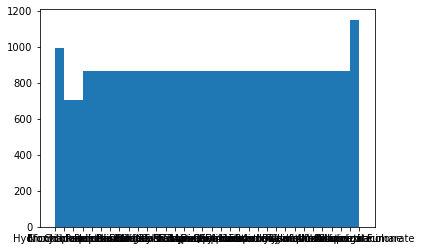

In [31]:
plt.hist(treatmentdf['treatment'], bins='auto')
plt.show()
# This distribution is not necessarily what I expect. Nans may be ok. The small group of those that have a count > 144 are of interest. 
# Why would the treatment not be a uniform distribution (not including nans).

#### Look into variable treatment_conc

In [32]:
df.groupby(by=['treatment_conc'], dropna=False).size() 
# Note that experiment variable is not balanced 
# This variable will be one of the main features going into the model
# I neede to determine how to handle Nans

treatment_conc
0.001         24
0.003       3244
0.010      42556
0.025         72
0.030      42660
0.100      42732
0.250         72
0.300      42660
1.000      42708
2.500         72
3.000      42636
10.000      3396
30.000       176
100.000      176
NaN        42336
dtype: int64

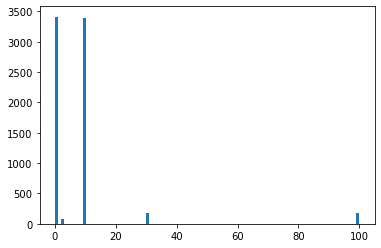

In [33]:
# look at data - not including nans
treatmentdf = df.groupby(['treatment_conc']).filter(lambda x: len(x) < 40000)
treatmentdf[:5]

plt.hist(treatmentdf['treatment_conc'], bins='auto')
plt.show()
# this is a fairly strange distribution but my assumption that the assignments of concentration in each treatment was thought out. 
#I would have assumed that the assignments of concentration would follow a normal distribution but I will assume that this is okay and go forward with my work.

#### Look into variable SMILES

In [34]:
df.groupby(by=['SMILES'], dropna=False).size() 
# Looks to be expected
# This variable is used to id. It will not be of use to the model.

SMILES
BrC1=C2N=CC=NC2=CC=C1NC1=NCCN1 |c:1,3,5,8,10,t:14|                               144
BrC1=CC=C(NC2C3CC4CC(C3)CC2C4)C=C1 |c:19,t:1,3|                                  144
C#CC1=CC(NC2=NC=NC3=C2C=C2OCCOCCOCCOC2=C3)=CC=C1 |c:8,10,26,28,30,t:2,6,13|      144
C#CCN[C@@H]1CCC2=CC=CC=C12 |c:9,t:7,11|                                          144
C(C(C1CCCCC1)C1CCCCC1)[C@H]1CCCCN1 |&1:14,r|                                     144
                                                                               ...  
[O-][N+](=O)C1=CN=CN1CCN1CCOCC1 |c:5,t:3|                                        144
[O-][N+](=O)C1=NC=CN1CC(=O)NCC1=CC=CC=C1 |c:5,16,18,t:3,14|                      144
[O-][N+](=O)NC1=NCCN1CC1=CN=C(Cl)C=C1 |c:16,t:4,11,13|                           144
[Zn++].[O-][N+]1=CC=CC=C1[S-].[O-][N+]1=CC=CC=C1[S-] |c:3,5,11,13,t:1,9|         144
NaN                                                                            42336
Length: 1671, dtype: int64

In [35]:
strdf['SMILES'] = df['SMILES'].astype('str')

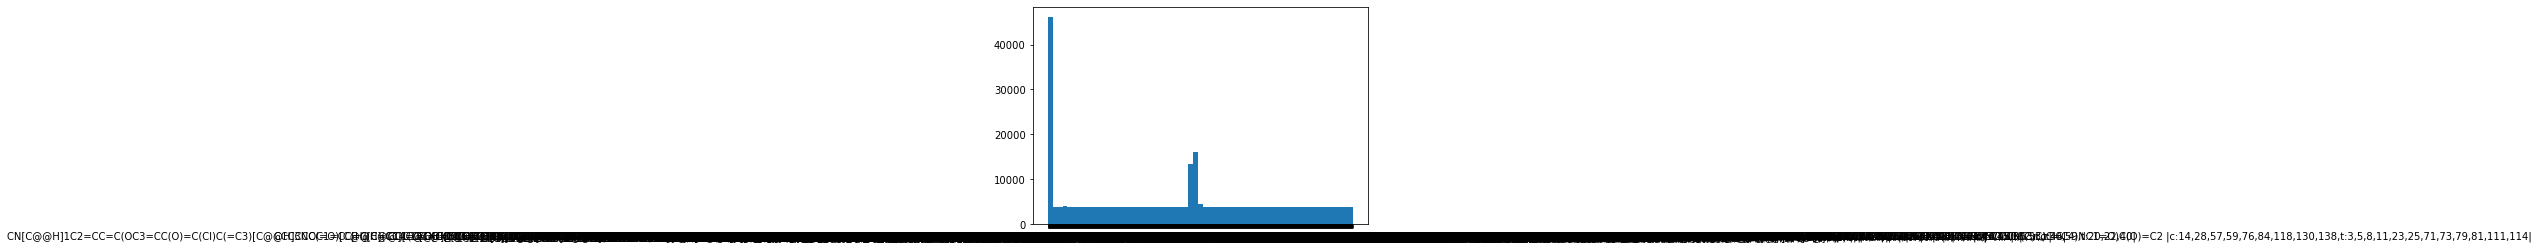

In [36]:
plt.hist(strdf['SMILES'], bins='auto')
plt.show()
# same strange distribution as found in "treatment" - this is to be expected. No additional data gained here.

### Look into embeddings

In [37]:
embeddings_df.isna() 

,site_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_1014,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87627,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87628,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87629,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87630,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
embeddings_df = embeddings_df.dropna()
#embeddings_df.isnull().values.any()

### Clean and Transform the data

#### Deal with blanks

In [39]:
# Are there any columns that have NAN values?
df.columns[df.isna().any()].tolist()
### No Null in those columns that identify specific tests. This is confirmation of what we would expect: site_id, well_id, cell_type, experiment, plate, well 

['treatment_conc']

In [40]:
#Is it appropriate to fill these with 0 or keep null
# Can fill 'SMILES' with 0 to represent that no formula is applicable
nans_to_zeros = ['treatment_conc', 'SMILES']

for x in nans_to_zeros:
    df[x].fillna(0 , inplace = True)

In [41]:
df[:5]

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
0,HRCE-1_1_AA02_1,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,1,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
1,HRCE-1_1_AA02_2,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,2,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
2,HRCE-1_1_AA02_3,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,3,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
3,HRCE-1_1_AA02_4,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,4,Active SARS-CoV-2,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
4,HRCE-1_1_AA03_1,HRCE-1_1_AA03,HRCE,HRCE-1,1,AA03,1,Active SARS-CoV-2,acetylcysteine,1.0,"CC(=O)N[C@H](CS)C(O)=O |a:4,r|"


In [42]:
# With my limited understanding I believe that healthy is labeled as mock or nan = 0
# Unhealthy = UV Inactivated SARS-CoV-2, Active SARS-CoV-2 = 1

cleanup_nums = {"disease_condition": {"Active SARS-CoV-2": 1, "UV Inactivated SARS-CoV-2": 1, "Mock": 0, "nan":0}}

df = df.replace(cleanup_nums)
df

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
0,HRCE-1_1_AA02_1,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,1,1,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
1,HRCE-1_1_AA02_2,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,2,1,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
2,HRCE-1_1_AA02_3,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,3,1,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
3,HRCE-1_1_AA02_4,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,4,1,Flubendazole,0.1,COC(=O)NC1=NC2=C(N1)C=C(C=C2)C(=O)C1=CC=C(F)C=...
4,HRCE-1_1_AA03_1,HRCE-1_1_AA03,HRCE,HRCE-1,1,AA03,1,1,acetylcysteine,1.0,"CC(=O)N[C@H](CS)C(O)=O |a:4,r|"
...,...,...,...,...,...,...,...,...,...,...,...
305515,VERO-2_2_Z46_4,VERO-2_2_Z46,VERO,VERO-2,2,Z46,4,1,Lopinavir,1.0,CC(C)[C@H](N1CCCNC1=O)C(=O)N[C@H](C[C@H](O)[C@...
305516,VERO-2_2_Z47_1,VERO-2_2_Z47,VERO,VERO-2,2,Z47,1,1,nan,0.0,nan
305517,VERO-2_2_Z47_2,VERO-2_2_Z47,VERO,VERO-2,2,Z47,2,1,nan,0.0,nan
305518,VERO-2_2_Z47_3,VERO-2_2_Z47,VERO,VERO-2,2,Z47,3,1,nan,0.0,nan


### Merge embeddings to features

In [43]:
totaldf = pd.merge(df, embeddings_df, how='inner', on=['site_id'])
totaldf

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,...,feature_1014,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023
0,HRCE-1_1_AA02_1,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,1,1,Flubendazole,0.10,...,0.510533,0.521343,-1.235075,-0.988819,-1.511446,-0.070583,0.006452,-0.032826,0.163227,-0.853727
1,HRCE-1_1_AA02_2,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,2,1,Flubendazole,0.10,...,0.799407,0.462847,-1.162257,-0.898975,-1.549092,-0.468930,0.188668,0.540891,0.245435,-1.243380
2,HRCE-1_1_AA02_3,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,3,1,Flubendazole,0.10,...,0.304898,0.361478,-1.582891,-0.507015,-1.317128,-0.242310,-0.278481,0.102980,-0.143062,-0.635477
3,HRCE-1_1_AA02_4,HRCE-1_1_AA02,HRCE,HRCE-1,1,AA02,4,1,Flubendazole,0.10,...,0.422549,0.314103,-1.280897,-0.709403,-1.189488,-0.173544,-0.094904,0.176565,-0.014068,-1.296512
4,HRCE-1_1_AA03_1,HRCE-1_1_AA03,HRCE,HRCE-1,1,AA03,1,1,acetylcysteine,1.00,...,1.086595,0.698080,-1.162634,-1.077002,-1.423002,0.114872,-0.589125,0.094143,-0.204997,-1.806350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87626,HRCE-1_25_G08_3,HRCE-1_25_G08,HRCE,HRCE-1,25,G08,3,0,nan,0.00,...,-0.461652,-0.249422,-0.044614,-1.035286,-1.646834,-0.530929,-0.831854,0.136743,-2.249688,-0.489460
87627,HRCE-1_25_G08_4,HRCE-1_25_G08,HRCE,HRCE-1,25,G08,4,0,nan,0.00,...,-0.440302,-0.105910,-0.023777,-0.979128,-1.901252,-0.369882,-1.190747,0.335877,-2.681743,-0.649515
87628,HRCE-1_25_G09_1,HRCE-1_25_G09,HRCE,HRCE-1,25,G09,1,1,Quinine,0.03,...,0.268115,-0.906840,0.514611,-0.302003,-1.615838,-0.419691,-0.391227,0.726986,-2.113313,-2.054353
87629,HRCE-1_25_G09_2,HRCE-1_25_G09,HRCE,HRCE-1,25,G09,2,1,Quinine,0.03,...,-0.466800,-0.009247,0.294348,-1.010018,-1.947750,0.379549,-1.555509,0.589163,-2.702630,-1.088372


In [44]:
totaldf["disease_condition"].value_counts()

1    82987
0     4644
Name: disease_condition, dtype: int64

## Decision Tree

In [45]:
#split dataset in features and target variable
X = totaldf.iloc[:, 11:] # Features
y = totaldf.disease_condition # Target variable


In [46]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(class_weight = 'balanced') #, max_depth=5) #, class_weight = 'balanced') # due to imbalanced data

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#This ran VERY differently when not balanced.

In [47]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [48]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                            feature_names=X.columns,  
                            class_names=['0','1'],
                            rounded=True, 
                            proportion = True,
                            #label = 'none',
                            filled=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('balanced_tree.png')
#view_pydot(pydot_graph)


True

In [49]:
#Print evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1004   417]
 [  358 24511]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1421
           1       0.98      0.99      0.98     24869

    accuracy                           0.97     26290
   macro avg       0.86      0.85      0.85     26290
weighted avg       0.97      0.97      0.97     26290



In [50]:
enddf=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
enddf

,Actual,Predicted
82926,1,1
62868,1,1
12673,1,1
63662,1,1
77150,1,1
...,...,...
27359,1,1
76099,1,1
66224,1,1
27120,1,1


In [51]:
enddf = pd.merge(enddf, totaldf.iloc[:, :11], left_index=True, right_index=True)
enddf

,Actual,Predicted,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
82926,1,1,HRCE-1_24_J45_3,HRCE-1_24_J45,HRCE,HRCE-1,24,J45,3,1,Aclidinium,0.03,[H]C12CC[N+](CCCOC3=CC=CC=C3)(CC1)C[C@@H]2OC(=...
62868,1,1,HRCE-1_20_R33_1,HRCE-1_20_R33,HRCE,HRCE-1,20,R33,1,1,Azilsartan medoxomil,1.00,CCOC1=NC2=CC=CC(C(=O)OCC3=C(C)OC(=O)O3)=C2N1CC...
12673,1,1,HRCE-1_11_G30_2,HRCE-1_11_G30,HRCE,HRCE-1,11,G30,2,1,Entrectinib,0.03,CN1CCN(CC1)C1=CC(NC2CCOCC2)=C(C=C1)C(=O)NC1=NN...
63662,1,1,HRCE-1_20_W12_3,HRCE-1_20_W12,HRCE,HRCE-1,20,W12,3,1,Acalabrutinib,3.00,CC#CC(=O)N1CCC[C@H]1C1=NC(=C2N1C=CN=C2N)C1=CC=...
77150,1,1,HRCE-1_23_H23_3,HRCE-1_23_H23,HRCE,HRCE-1,23,H23,3,1,Apatinib,0.10,O=C(NC1=CC=C(C=C1)C1(CCCC1)C#N)C1=CC=CN=C1NCC1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27359,1,1,HRCE-1_14_AD03_4,HRCE-1_14_AD03,HRCE,HRCE-1,14,AD03,4,1,Ranolazine,0.30,COC1=CC=CC=C1OCC(O)CN1CCN(CC(=O)NC2=C(C)C=CC=C...
76099,1,1,HRCE-1_23_B36_4,HRCE-1_23_B36,HRCE,HRCE-1,23,B36,4,1,Fenoterol,0.10,CC(CC1=CC=C(O)C=C1)NCC(O)C1=CC(O)=CC(O)=C1 |c:...
66224,1,1,HRCE-1_21_G18_1,HRCE-1_21_G18,HRCE,HRCE-1,21,G18,1,1,Toremifene,0.30,CN(C)CCOC1=CC=C(C=C1)C(=C(\CCCl)C1=CC=CC=C1)\C...
27120,1,1,HRCE-1_14_AB36_1,HRCE-1_14_AB36,HRCE,HRCE-1,14,AB36,1,1,Thiocolchicoside,0.30,COC1=C(OC)C2=C(CC[C@H](NC(C)=O)C3=CC(=O)C(SC)=...


In [52]:
goodrescues = enddf.loc[(enddf['Actual'] == 1) & (enddf['Predicted'] == 0)]
goodrescues

,Actual,Predicted,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc,SMILES
45955,1,0,HRCE-1_17_N08_4,HRCE-1_17_N08,HRCE,HRCE-1,17,N08,4,1,nan,0.00,nan
16046,1,0,HRCE-1_11_Z39_3,HRCE-1_11_Z39,HRCE,HRCE-1,11,Z39,3,1,ibuproxam,3.00,"CC(C)CC1=CC=C(C=C1)C(C)C(=O)NO |c:6,8,t:4|"
17689,1,0,HRCE-1_12_E36_2,HRCE-1_12_E36,HRCE,HRCE-1,12,E36,2,1,Hydralazine,3.00,"N\N=C1/NN=CC2=CC=CC=C12 |c:4,8,t:6,10|"
56521,1,0,HRCE-1_19_M16_2,HRCE-1_19_M16,HRCE,HRCE-1,19,M16,2,1,nan,0.00,nan
72189,1,0,HRCE-1_22_J41_2,HRCE-1_22_J41,HRCE,HRCE-1,22,J41,2,1,Metamizole,0.10,CN(CS([O-])(=O)=O)C1=C(C)N(C)N(C1=O)C1=CC=CC=C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77859,1,0,HRCE-1_23_L35_4,HRCE-1_23_L35,HRCE,HRCE-1,23,L35,4,1,Meloxicam,0.30,CN1C(C(=O)NC2=NC=C(C)S2)=C(O)C2=C(C=CC=C2)S1(=...
16290,1,0,HRCE-1_12_AB08_3,HRCE-1_12_AB08,HRCE,HRCE-1,12,AB08,3,1,nan,0.00,nan
17703,1,0,HRCE-1_12_E39_4,HRCE-1_12_E39,HRCE,HRCE-1,12,E39,4,1,Ribociclib,0.03,CN(C)C(=O)C1=CC2=CN=C(NC3=NC=C(C=C3)N3CCNCC3)N...
40022,1,0,HRCE-1_16_J38_3,HRCE-1_16_J38,HRCE,HRCE-1,16,J38,3,1,Rufinamide,0.03,"NC(=O)C1=CN(CC2=C(F)C=CC=C2F)N=N1 |c:7,10,12,1..."


In [53]:
goodrescues.groupby(by=['treatment'], dropna=False).size().sort_values(ascending=False).nlargest(21)


treatment
nan                                        184
trandolapril                                 3
Axitinib                                     3
verapamil                                    2
Irbesartan                                   2
fexinidazole                                 2
EPZ005687                                    2
Ebselen                                      2
eszopiclone                                  2
cis-9,trans-11-Conjugated-linoleic-acid      2
aminolevulinic-acid-benzyl-ester             2
Tafenoquine succinate                        2
Cysteamine                                   2
Sclareolide                                  2
Medroxyprogesterone                          2
Ribavirin                                    2
Meloxicam                                    2
Metamizole                                   2
Methenamine                                  2
Pexidartinib                                 2
Nilutamide                                   2
dty